Import

In [1]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from matplotlib import pyplot as plt

2025-07-17 03:54:11.152036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752724451.514545     119 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752724451.618232     119 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**LoadData**

In [2]:

images = []
ages = []

for i in os.listdir('../input/utkface-cropped/UTKFace/'):
    split = i.split('_')
    ages.append(int(split[0]))

    images.append(Image.open('../input/utkface-cropped/UTKFace/' + i))

In [3]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')

df = pd.concat([images, ages], axis=1)
df

,Images,Ages
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,22
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,21
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,28
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,17
...,...,...
23703,<PIL.JpegImagePlugin.JpegImageFile image mode=...,41
23704,<PIL.JpegImagePlugin.JpegImageFile image mode=...,42
23705,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2
23706,<PIL.JpegImagePlugin.JpegImageFile image mode=...,65


/tmp/ipykernel_119/4129846311.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ages', ylabel='Density'>

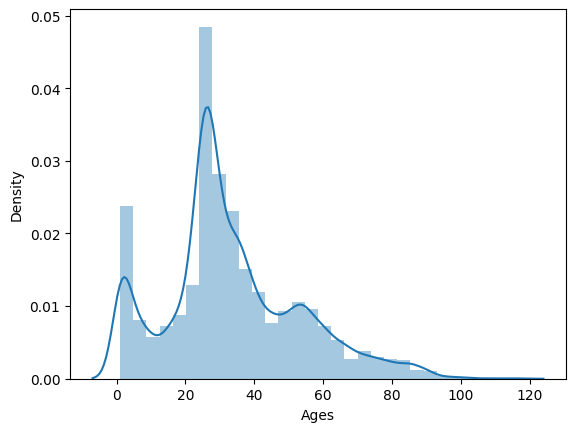

In [4]:
# chỉ đưa vào 1/3 số tuổi từ 0 đến 4 vì ở tuổi này có quá nhiều
# under4s = []

# for i in range(len(df)):
#     if df['Ages'].iloc[i] <= 4:
#         under4s.append(df.iloc[i])
# under4s = pd.DataFrame(under4s)
# under4s = under4s.sample(frac=0.3)

# df = df[df['Ages'] > 4]

# df = pd.concat([df, under4s], ignore_index = True)
sns.distplot(df['Ages'],kde=True, bins=30)

/tmp/ipykernel_119/3630449536.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ages', ylabel='Density'>

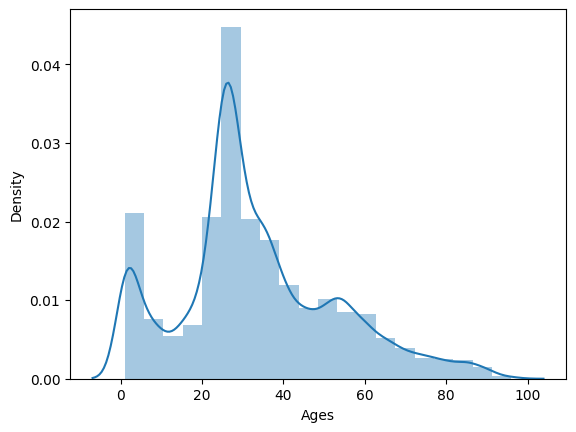

In [5]:
# loại bỏ tuổi từ 99 trở đi vì có ít dữ liệu
df = df[df['Ages'] < 99]
sns.distplot(df['Ages'],kde=True, bins=20)

In [6]:
x = []
y = []

for _, row in df.iterrows():
    # Resize ảnh
    img_resized = row['Images'].resize((200, 200), Image.Resampling.LANCZOS)
    # Chuyển sang array
    img_array = np.asarray(img_resized)
    x.append(img_array)

    # Lưu nhãn
    age = int(row['Ages'])
    y.append([age])

x = np.array(x)
y = np.array(y)

**Train test split**

In [7]:
y_age = df['Ages']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)

In [8]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(256, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='linear'))

agemodel.compile(optimizer='adam', loss='mae', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752724621.802907     119 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752724621.803562     119 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


**Training**

In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train = datagen.flow(x_train_age, y_train_age, batch_size=32)

test = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)
history1 = agemodel.fit(
    train,
    epochs=100,
    shuffle=True,
    validation_data=test
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1752724630.395572     154 service.cc:148] XLA service 0x7d0f10002210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752724630.397162     154 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752724630.397188     154 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752724630.833780     154 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/592 ━━━━━━━━━━━━━━━━━━━━ 1:39:16 10s/step - loss: 36.8424 - mae: 36.8424

I0000 00:00:1752724637.058202     154 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


592/592 ━━━━━━━━━━━━━━━━━━━━ 178s 283ms/step - loss: 17.6034 - mae: 17.6034 - val_loss: 14.3186 - val_mae: 14.3186
Epoch 2/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 159s 268ms/step - loss: 15.3454 - mae: 15.3454 - val_loss: 12.7220 - val_mae: 12.7220
Epoch 3/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 159s 269ms/step - loss: 14.2852 - mae: 14.2852 - val_loss: 11.3937 - val_mae: 11.3937
Epoch 4/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 164s 277ms/step - loss: 13.2451 - mae: 13.2451 - val_loss: 10.5612 - val_mae: 10.5612
Epoch 5/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 161s 272ms/step - loss: 12.3132 - mae: 12.3132 - val_loss: 10.5645 - val_mae: 10.5645
Epoch 6/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 161s 272ms/step - loss: 11.8423 - mae: 11.8423 - val_loss: 8.8883 - val_mae: 8.8883
Epoch 7/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 159s 269ms/step - loss: 11.1219 - mae: 11.1219 - val_loss: 8.3042 - val_mae: 8.3042
Epoch 8/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 160s 270ms/step - loss: 10.7184 - mae: 10.7184 - val_loss: 7.8864 - val_mae: 7.8864
Ep

In [ ]:
agemodel.save('/kaggle/working/agemodel_new.h5')

In [ ]:
from IPython.display import FileLink

FileLink('agemodel.h5')

**Evaluating the Models**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


file_path = '/kaggle/input/training-results/training_results.csv'

history_df = pd.read_csv(file_path)

plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.plot(history_df['Epoch'], history_df['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(history_df['Epoch'], history_df['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Biểu đồ Loss theo Epoch', fontsize=15, fontweight='bold')
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)

if history_df['Epoch'].dtype == 'int64' or history_df['Epoch'].apply(float.is_integer).all():
     plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.subplot(1, 2, 2)
plt.plot(history_df['Epoch'], history_df['mae'], label='Train MAE', color='green', linewidth=2)
plt.plot(history_df['Epoch'], history_df['val_mae'], label='Validation MAE', color='red', linewidth=2)
plt.title('Biểu đồ Mean Absolute Error (MAE) theo Epoch', fontsize=15, fontweight='bold')
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Mean Absolute Error', fontsize=13)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
if history_df['Epoch'].dtype == 'int64' or history_df['Epoch'].apply(float.is_integer).all():
     plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.suptitle('Đánh giá hiệu suất mô hình dự đoán tuổi', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot to a file
plt.savefig('model_performance_plot.png')
plt.show()

print("\nBiểu đồ đã được tạo và lưu với tên 'model_performance_plot.png'.")


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x_test_norm = x_test_age / 255.0
y_pred_age = agemodel.predict(x_test_norm).reshape(-1)
y_test_real = y_test_age.values.reshape(-1)

mae = mean_absolute_error(y_test_real, y_pred_age)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_age))
r2 = r2_score(y_test_real, y_pred_age)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.2f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test_real, y_pred_age, alpha=0.6, color='teal')
plt.plot([min(y_test_real.min(), y_pred_age.min()), max(y_test_real.max(), y_pred_age.max())],
         [min(y_test_real.min(), y_pred_age.min()), max(y_test_real.max(), y_pred_age.max())],
         'r--') # Đảm bảo đường chéo bao phủ hết các điểm
plt.xlabel('Tuổi thực tế', fontsize=12)
plt.ylabel('Tuổi dự đoán', fontsize=12)
plt.title('So sánh Tuổi Thực tế và Tuổi Dự đoán trên tập Test', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('so_sanh_tuoi_thucte_du_doan.png')
plt.show()
